<a href="https://colab.research.google.com/github/bnPavithra23/Diabetes_predicter/blob/main/Diabetes_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Diabetes Prediction

## What is Diabetes?
Diabetes is a chronic disease that occurs when the pancreas is no longer able to make insulin, or when the body cannot make good use of the insulin it produces. Learning how to use Machine Learning can help us predict Diabetes.

## About this project :-
The objective of this project is to classify whether someone has diabetes or not.
Dataset consists of several Medical Variables(Independent) and one Outcome Variable(Dependent).
The independent variables in this data set are :-'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'.
The outcome variable value is either 1 or 0 indicating whether a person has diabetes(1) or not(0).

## Import the necessary libraries

In [ ]:
import numpy as np # for Reding and analyze data
import pandas as pd # for Mathematical operations
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #used for data visualization

## Loading the dataset

In [ ]:
df = pd.read_csv('/content/diabetes_dataset.csv')
print("Dataset loaded succesfully !!")

Dataset loaded succesfully !!


In [ ]:
#first 10 rows of the data
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,bloodsugar,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,123.0,33.6,0.627,50,1
1,1,85,66,29,0,115.0,26.6,0.351,31,0
2,8,183,64,0,0,101.0,23.3,0.672,32,1
3,1,89,66,23,94,197.0,28.1,0.167,21,0
4,0,137,40,35,168,172.0,43.1,2.288,33,1
5,5,116,74,0,0,102.0,25.6,0.201,30,0
6,3,78,50,32,88,112.0,31.0,0.248,26,1
7,10,115,0,0,0,143.0,35.3,0.134,29,0
8,2,197,70,45,543,143.0,30.5,0.158,53,1
9,8,125,96,0,0,138.0,0.0,0.232,54,1


In [ ]:
#last 10 rows of the data
df.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,bloodsugar,BMI,DiabetesPedigreeFunction,Age,Outcome
1097,7,114,76,17,110,92.000,23.8,0.466,31,0
1098,8,126,74,38,75,71.000,25.9,0.162,39,0
1099,4,132,86,31,0,93.000,28.0,0.419,63,0
1100,3,158,70,30,328,122.000,35.5,0.344,35,1
1101,0,123,88,37,0,163.000,35.2,0.197,29,0
1102,4,85,58,22,49,151.000,27.8,0.306,28,0
1103,0,84,82,31,125,125.000,38.2,0.233,23,0
1104,0,145,0,0,0,81.000,44.2,0.630,31,1
1105,0,135,68,42,250,85.000,42.3,0.365,24,1
1106,1,139,62,41,480,0.536,21.0,0.000,22,0


In [ ]:
#number of rows and columns in this dataset
df.shape

(1107, 10)

In [ ]:
df.columns #about the columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'bloodsugar', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.info() #Print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1107 non-null   int64  
 1   Glucose                   1107 non-null   int64  
 2   BloodPressure             1107 non-null   int64  
 3   SkinThickness             1107 non-null   int64  
 4   Insulin                   1107 non-null   int64  
 5   bloodsugar                1107 non-null   float64
 6   BMI                       1107 non-null   float64
 7   DiabetesPedigreeFunction  1107 non-null   float64
 8   Age                       1107 non-null   int64  
 9   Outcome                   1107 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 86.6 KB


In [ ]:
#statistical measures of the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,bloodsugar,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,1107.00000
mean,3.786811,121.538392,69.011743,20.650407,80.434508,121.313944,32.084011,0.477596,33.134598,0.35953
std,3.349137,32.030375,19.313228,15.878657,117.066217,31.496268,7.780791,0.336211,11.710142,0.48008
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.00000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,100.000000,27.300000,0.245000,24.000000,0.00000
50%,3.000000,118.000000,72.000000,23.000000,36.000000,117.000000,32.000000,0.380000,29.000000,0.00000
75%,6.000000,141.000000,80.000000,32.000000,126.000000,142.000000,36.600000,0.630500,40.000000,1.00000
max,17.000000,199.000000,122.000000,99.000000,846.000000,197.000000,67.100000,2.420000,81.000000,1.00000


## Data cleaning

In [ ]:
#dropping duplicate values - checking if there are any duplicate rows and dropping if any
df=df.drop_duplicates()

In [ ]:
# check for missing values, count them and print the sum for every column
df.isnull().sum() #conclusion :- there are no null values in this dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
bloodsugar                  0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# checking counts of output that is 'OutCome'
df['Outcome'].value_counts()

0    706
1    397
Name: Outcome, dtype: int64

###### 0 --> Non-diabetic

###### 1 --> diabetic

## Data Visualization

<Axes: xlabel='Outcome', ylabel='count'>

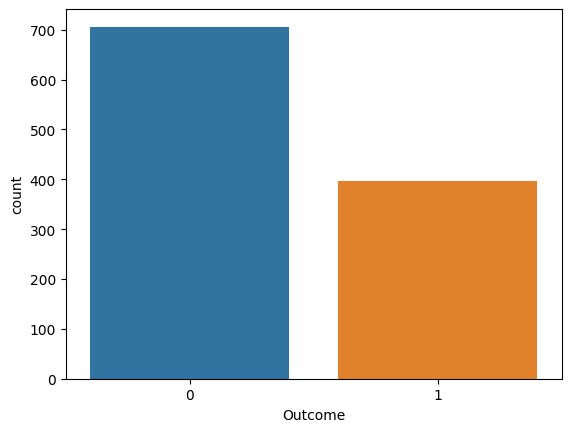

In [ ]:
# to see if the dataset is balanced or not
sns.countplot(x=df['Outcome'])

###### Out of 1107 people 406 are diabetic positive and 701 non diabetic

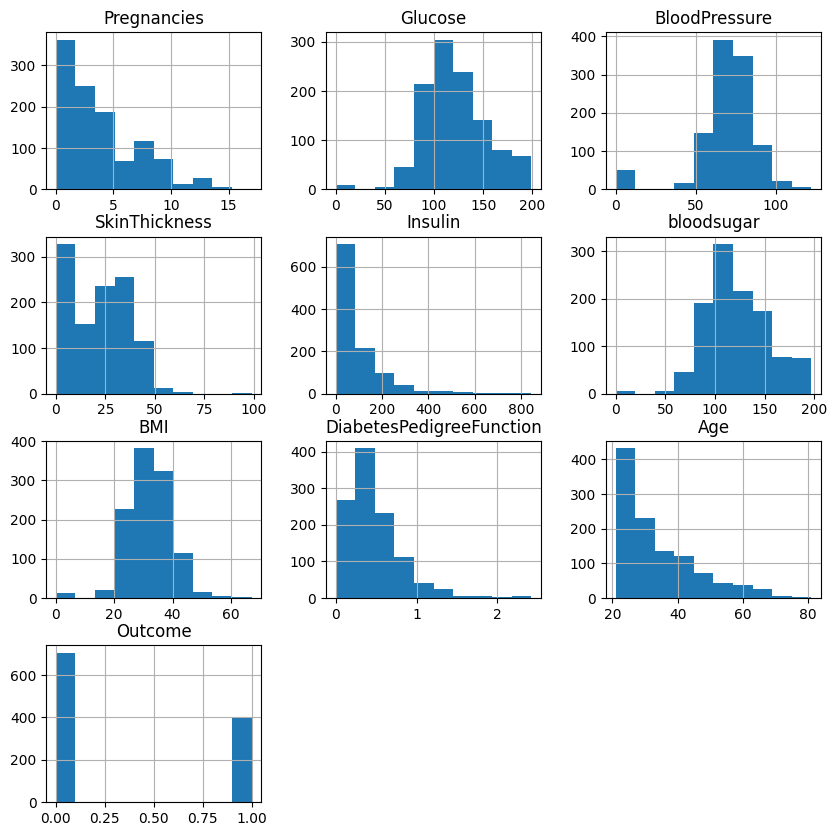

In [ ]:
#histogram for each  feature
df.hist(bins=10,figsize=(10,10))
plt.show()

<Axes: xlabel='DiabetesPedigreeFunction'>

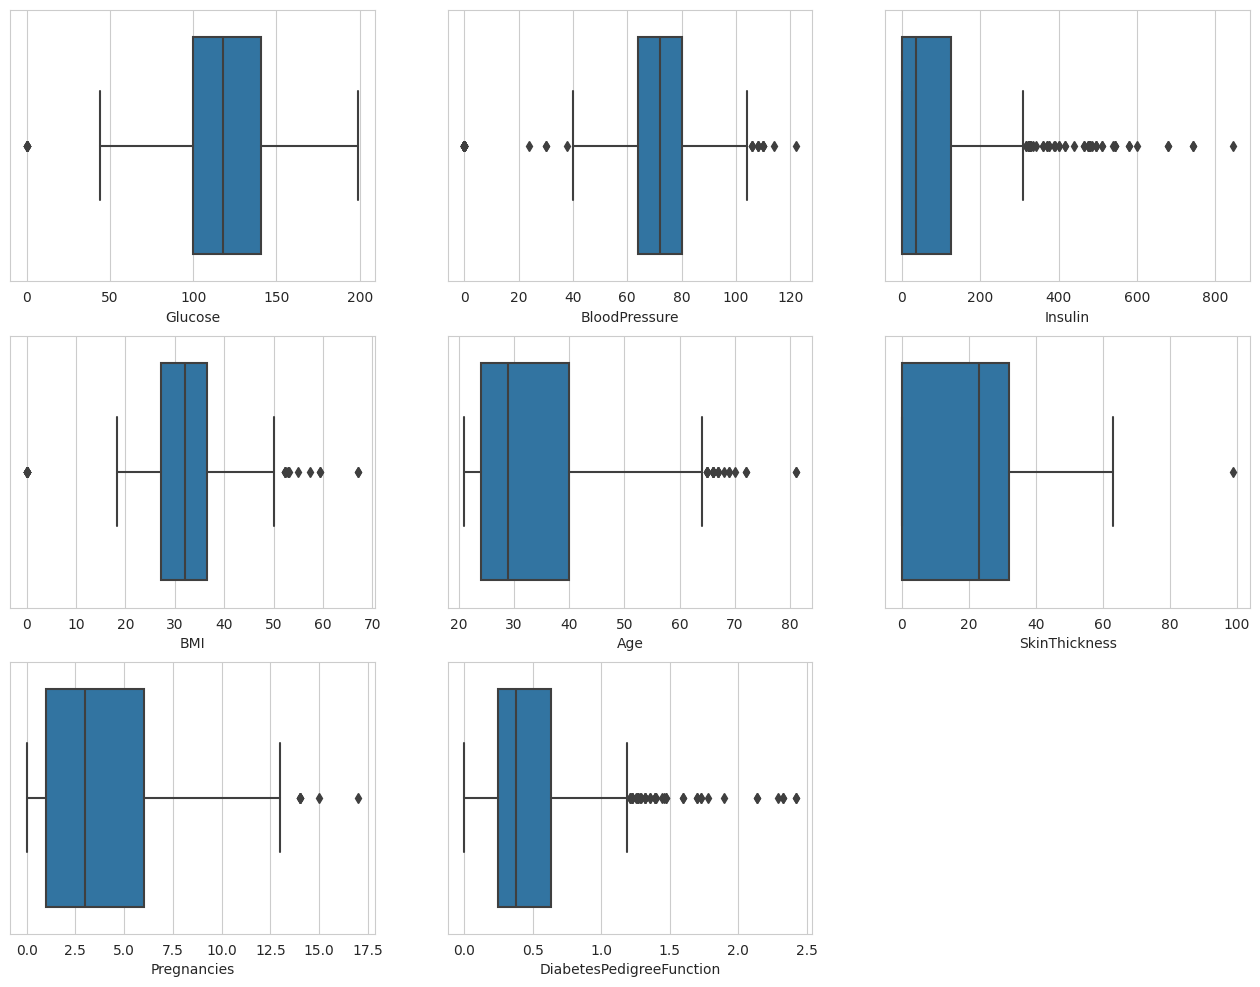

In [ ]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=df)

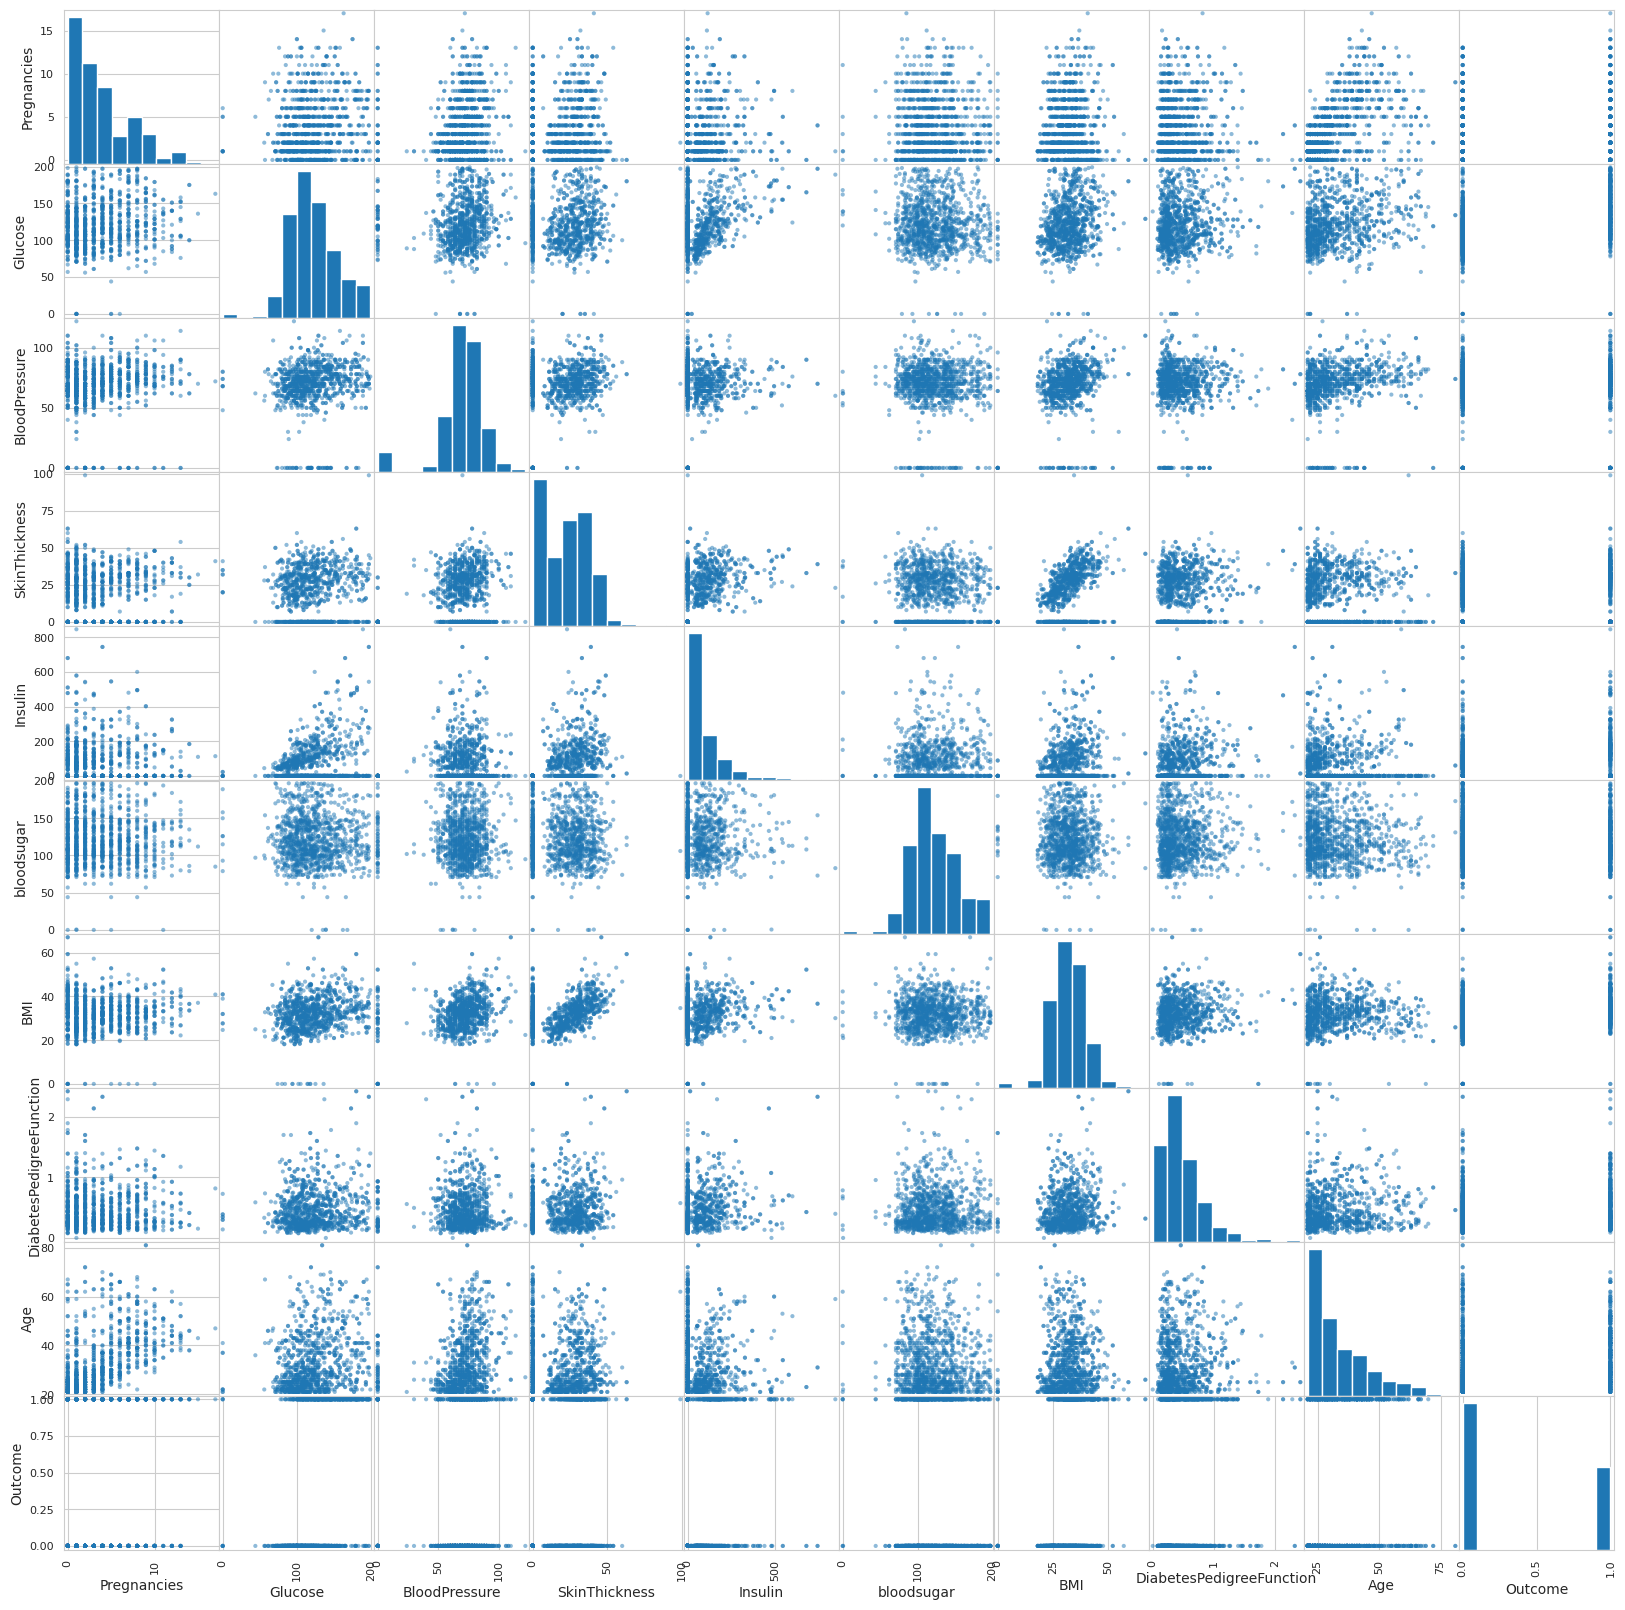

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(20,20));
# we can come to various conclusion looking at these plots for example  if you observe 5th plot in pregnancies with insulin, you can conclude that women with higher number of pregnancies have lower insulin

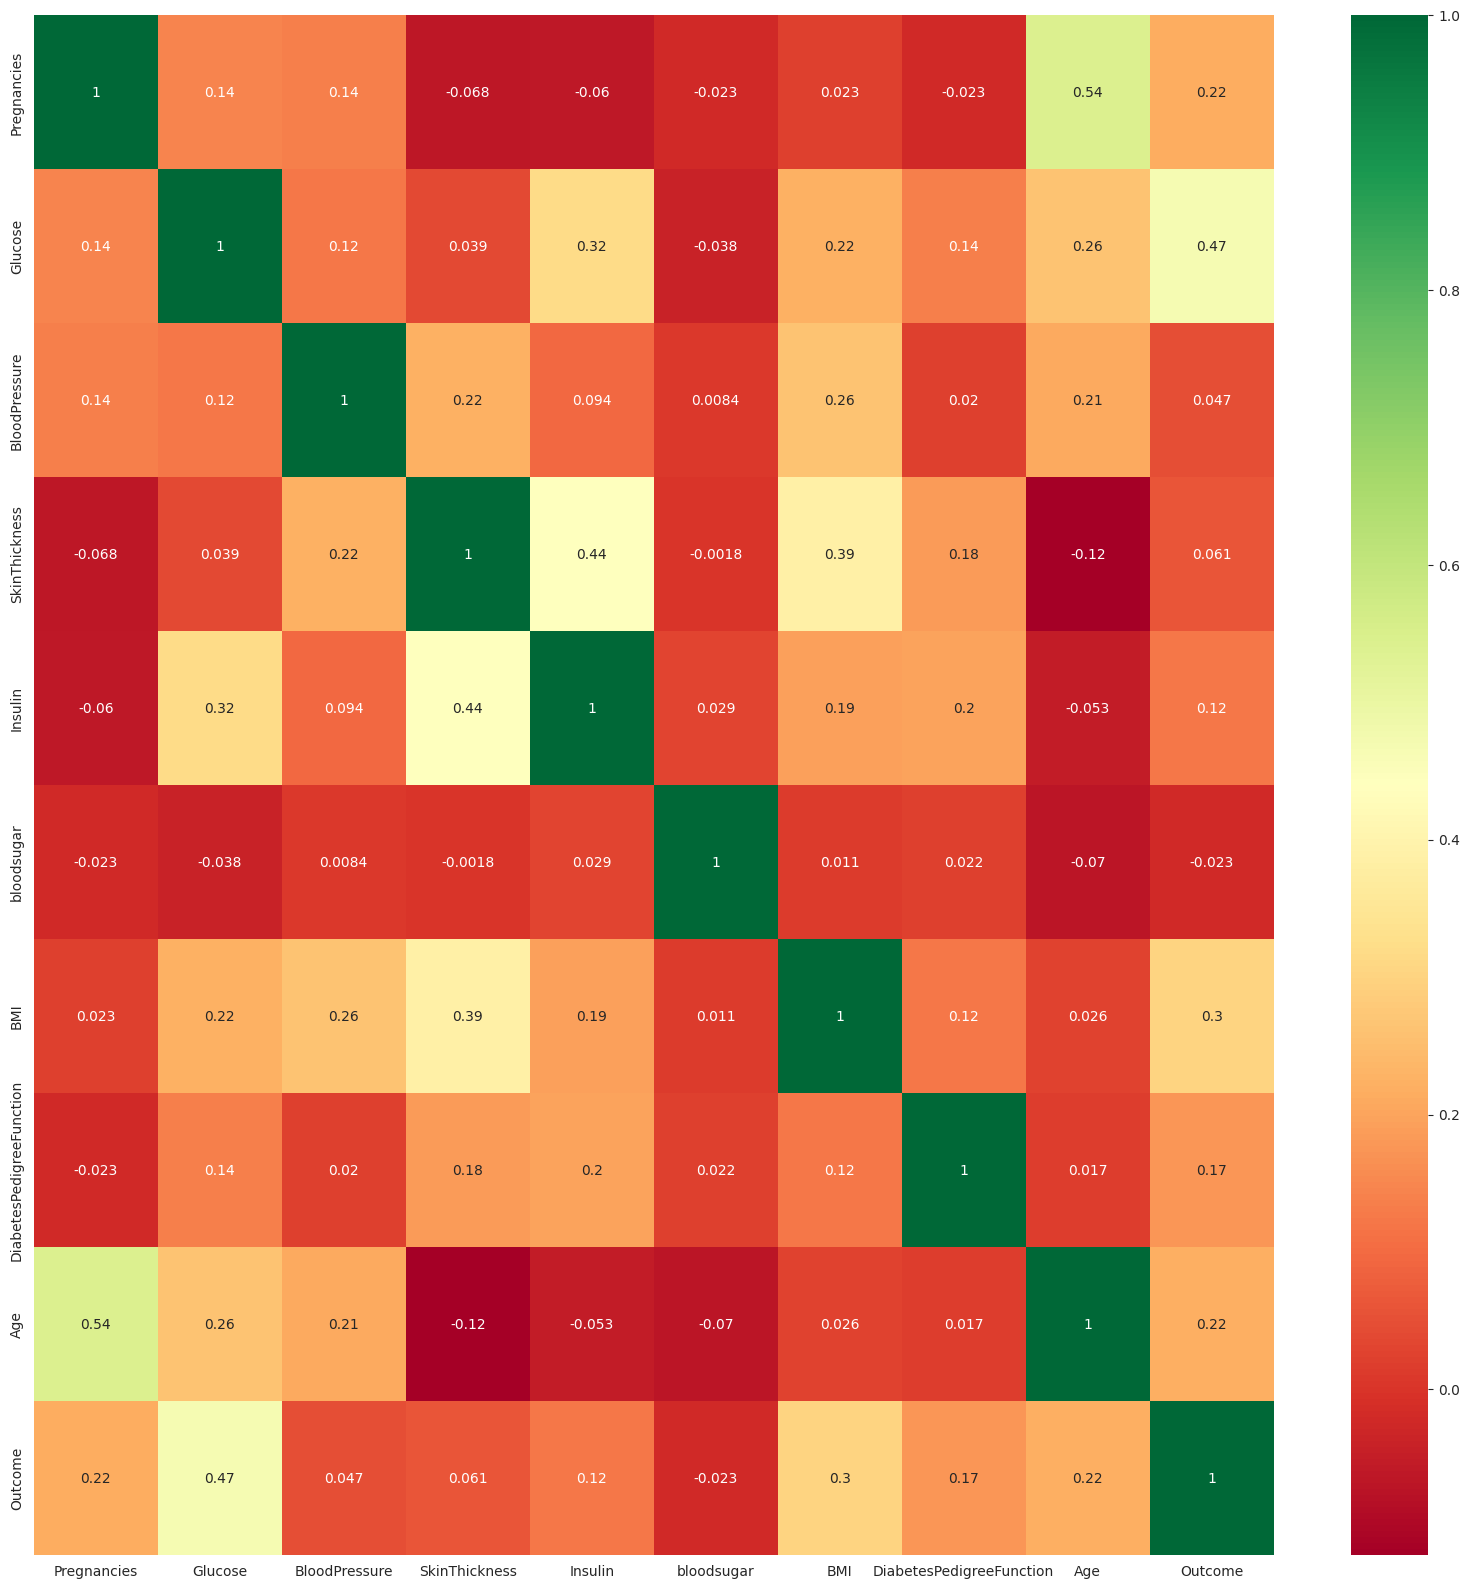

In [ ]:
#get correlations of each features in dataset
corrmat = df.corr()##This line calculates the correlation matrix of the DataFrame
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

###### Darker colors represent stronger positive correlations, while lighter colors represent weaker correlations or negative correlations.¶
Observe the last row 'Outcome' and note its correlation scores with different features. We can observe that Glucose, BMI and Age are the most correlated with Outcome. BloodPressure, Insulin, DiabetesPedigreeFunction are the least correlated, hence they don't contribute much to the model so we can drop them

In [ ]:
# Mean value for both cases
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,bloodsugar,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,,
0,3.249292,110.216714,68.327195,19.906516,69.338527,121.898776,30.326346,0.434330,31.225212
1,4.755668,141.392947,70.231738,21.934509,99.521411,120.418136,35.204534,0.555411,36.521411


In [ ]:
# seperating the data and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print(X)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  0.    145.      0.    ...  44.2     0.63   31.   ]
 [  0.    135.     68.    ...  42.3     0.365  24.   ]
 [  1.    139.     62.    ...  21.      0.     22.   ]]


In [ ]:
print(y)

[1 0 1 ... 1 1 0]


## Data Standardization

In [ ]:
# Performing standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_X = sc.fit_transform(X)

In [ ]:
scaled_X

array([[ 0.65927042,  0.83115868,  0.15450635, ...,  0.19545283,
         0.44346419,  1.44139159],
       [-0.83328966, -1.14018358, -0.15581931, ..., -0.70592771,
        -0.37749172, -0.18213005],
       [ 1.25629445,  1.92634883, -0.25926119, ..., -1.13086426,
         0.57731569, -0.09668154],
       ...,
       [-1.13180168,  0.73728524, -3.56940156, ...,  1.56040051,
         0.45238762, -0.18213005],
       [-1.13180168,  0.42437377, -0.05237742, ...,  1.31574008,
        -0.33584903, -0.7802696 ],
       [-0.83328966,  0.54953836, -0.36270308, ..., -1.42703215,
        -1.42153348, -0.95116661]])

### TRAIN TEST SPLIT

In [ ]:
# replacing scaled_X to X
X = scaled_X
X

array([[ 0.65927042,  0.83115868,  0.15450635, ...,  0.19545283,
         0.44346419,  1.44139159],
       [-0.83328966, -1.14018358, -0.15581931, ..., -0.70592771,
        -0.37749172, -0.18213005],
       [ 1.25629445,  1.92634883, -0.25926119, ..., -1.13086426,
         0.57731569, -0.09668154],
       ...,
       [-1.13180168,  0.73728524, -3.56940156, ...,  1.56040051,
         0.45238762, -0.18213005],
       [-1.13180168,  0.42437377, -0.05237742, ...,  1.31574008,
        -0.33584903, -0.7802696 ],
       [-0.83328966,  0.54953836, -0.36270308, ..., -1.42703215,
        -1.42153348, -0.95116661]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=2)

In [ ]:
# Let's check shapes
print(X.shape,X_train.shape, X_test.shape)

(1103, 9) (882, 9) (221, 9)


### Model selection
Our task is about predicting the disease but there are many Machine Learning Classification algorithms. We can't use directly one of the algorithm, so we need to make pipeline first and finding suitable algorithm.

#### Scikit-Learn Pipeline

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [ ]:
# Linear Regression
pipeline_lr = Pipeline([('scaler1', StandardScaler()),
                        ('pca1', PCA(n_components=2)),
                        ('lr', LogisticRegression())])

# Support Vector Classifier
pipeline_svc = Pipeline([('scaler2', StandardScaler()),
                        ('pca2', PCA(n_components=2)),
                        ('svc', SVC(kernel='linear'))])

# Decision Tree Classifier
pipeline_dt = Pipeline([('scaler3', StandardScaler()),
                        ('pca3', PCA(n_components=2)),
                        ('dt', DecisionTreeClassifier())])

# Random Forest Classifier
pipeline_rf = Pipeline([('scaler4', StandardScaler()),
                        ('pca4', PCA(n_components=2)),
                        ('rf', RandomForestClassifier(n_estimators=200))])

# K-Means
pipeline_km = Pipeline([('scaler5', StandardScaler()),
                        ('pca5', PCA(n_components=2)),
                        ('km', KMeans(n_clusters=2, random_state=0))])

# Naive Bayes - GaussianNB
pipeline_gnb = Pipeline([('scaler6', StandardScaler()),
                        ('pca6', PCA(n_components=2)),
                        ('gnb', GaussianNB())])
# XGBoost CLassifier
pipeline_xgb = Pipeline([('scaler7', StandardScaler()),
                        ('pca7', PCA(n_components=2)),
                        ('xgb', GradientBoostingClassifier())])


# K-Nearest Neighbors
pipeline_knb = Pipeline([('scaler8', StandardScaler()),
                        ('pca8', PCA(n_components=2)),
                        ('knb', KNeighborsClassifier())])

In [ ]:
#List of pipelines
pipelines = [pipeline_svc, pipeline_dt, pipeline_gnb, pipeline_km, pipeline_lr,pipeline_xgb, pipeline_knb, pipeline_rf]

In [ ]:
best_accuracy = 0.0
best_classifier = 0
best_pipeline = ""

pipe_dict = {
    0:'Logistic Regression',
    1:"Support Vector Classifier",
    2:"Decision Tree",
    3:"Random Forest Classifier",
    4:"KMeans",
    5:"Naive Bayes",
    6:"XGBoost",
    7:"K-Nearest"
}

In [ ]:
for pipe in pipelines :
  pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
for i, model in enumerate(pipelines):
  print('{} Test Accuracy: {}\n'.format(pipe_dict[i], model.score(X_test, y_test)))

Logistic Regression Test Accuracy: 0.751131221719457

Support Vector Classifier Test Accuracy: 0.7058823529411765

Decision Tree Test Accuracy: 0.751131221719457

Random Forest Classifier Test Accuracy: -523.1078241206442

KMeans Test Accuracy: 0.7420814479638009

Naive Bayes Test Accuracy: 0.7058823529411765

XGBoost Test Accuracy: 0.7420814479638009

K-Nearest Test Accuracy: 0.7375565610859729



In [ ]:
for i, model in enumerate(pipelines):
  if model.score(X_test, y_test) > best_accuracy:
    best_accuracy = model.score(X_test, y_test)
    best_pipeline = model
    best_classifier = i

print("Classifier with best accuracy: {}".format(pipe_dict[best_classifier]))

Classifier with best accuracy: Logistic Regression


### Training the model
Okay, so now we are going to build machine learning model, after running piplines we are going to use Logistic Regressoin cause our output is binary i.e. 0 and 1 (Logistic Regression is best in this case according to our pipelines

###### Logistic Regression

In [ ]:
model  = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

## Model Evalutaion
Lets check classification report,confusion marix and accuracy score of above model

In [ ]:
#importing tools
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
# prediction classes
y_pred = model.predict(X_test)

###### Classification Report

In [ ]:
print("CLASSIFICATION REPORT: ")
print(classification_report(y_test, y_pred))

CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       141
           1       0.77      0.62      0.69        80

    accuracy                           0.80       221
   macro avg       0.79      0.76      0.77       221
weighted avg       0.79      0.80      0.79       221



###### Accuracy Score

In [ ]:
#Accuracy score of training data
X_train_pred = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_pred,y_train )*100
print("ACCURACY OF TRAINING DATA: ",training_data_accuracy.round(2))

ACCURACY OF TRAINING DATA:  77.21


In [ ]:
#Accuracy score of testing data
X_test_pred = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_pred,y_test)*100
print("ACCURACY OF TESTING DATA: ",testing_data_accuracy.round(2))

ACCURACY OF TESTING DATA:  79.64


###### Confusion Matrix

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

<Axes: >

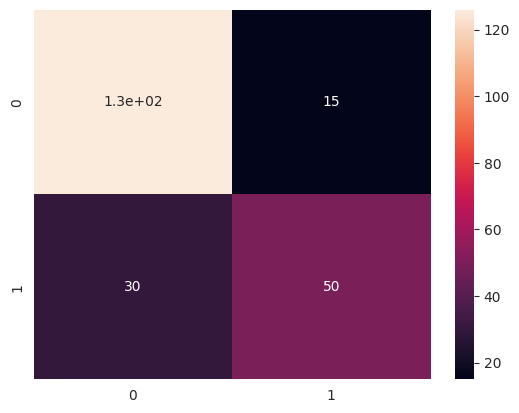

In [ ]:
#Visualizing the Confusion Matrix
import seaborn as sns
sns.heatmap(cm,annot=True)

### Making a predictive System

In [ ]:
# input_data = (1,85,66,29,0,115,26.6,0.351,31) # not diabetic
input_data = (6,148,72,35,0,123,33.6,0.627,50)  # diabetic

# input data into numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the inputdata
std_data = sc.transform(input_data_reshaped)
# print(std_data)

prediction = model.predict(std_data) # imp line
# print(prediction)

if (prediction[0]==0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

The person is diabetic


In [ ]:
input_data = (1,85,66,29,0,115,26.6,0.351,31) # not diabetic
#input_data = (6,148,72,35,0,123,33.6,0.627,50)  # diabetic

# input data into numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the inputdata
std_data = sc.transform(input_data_reshaped)
# print(std_data)

prediction = model.predict(std_data) # imp line
# print(prediction)

if (prediction[0]==0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

The person is not diabetic
